# Simple Evolutionary Exploration  Walkthrough

This notebook contains instructions on how to use the SEE module, along with several examples. These instructions will cover the following parts: 
* [Import Image Files](#Import_Image_Files)
* [Manual Search](#Manual_Search)
* [Genetic Algorithm Search](#Genetic_Algorithm_Search)
* [Reading the Results](#Reading_the_Results)

----
<a name="Import_Image_Files"></a>

## Import Image Files

First import the following packages:

In [1]:
import matplotlib.pylab as plt
%matplotlib inline
import imageio

Next, read in the image to be segmented, and the ground truth segmentation mask of the image:

In [2]:
#Binary Example 
img = imageio.imread('Image_data/Examples/Image 1.jpg')
quick = imageio.imread('Image_data/Examples/Image 1.jpg')
gmask = (quick[:,:,1] > 128) 

gmask2= quick[:,:,1] > 190
# #Multilabel Array Example
# img = imageio.imread('Image_data/Examples/Street.png')
# gmask = imageio.imread('Image_data/Examples/Street_GT.png')

In [3]:
img.shape

(238, 982, 3)

The ground truth mask should only contain one channel, and should only contain as many unique values as there are segments. If these conditions are not met, consider relabeling the image, converting the image to grayscale, or indexing to only use one channel (see below).

The following can now be used to see the imported images:

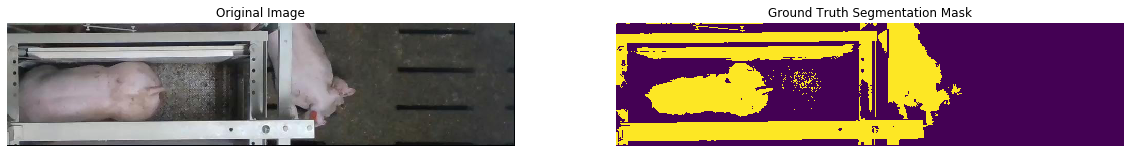

In [4]:
plt.figure(figsize= (20, 10))
plt.subplot(121)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(122)
plt.imshow(gmask)
plt.title("Ground Truth Segmentation Mask")
plt.axis("off")

plt.tight_layout
plt.show()

----
<a name="Manual_Search"></a>

## Manual Search

First import image files, as well as the following packages:

In [5]:
from see import JupyterGUI, Segmentors

Manual searching of parameters can easily be done using the provided GUI. Pre-established parameters can be put into the widget, or the parameter values can be changed using the sliders. To change the algorithm, simply change the `alg` input. For a list of available inputs print `Segmentors.algorithmspace`


In [6]:
Segmentors.algorithmspace

{'CT': see.Segmentors.ColorThreshold,
 'AAA': see.Segmentors.TripleA,
 'FB': see.Segmentors.Felzenszwalb,
 'SC': see.Segmentors.Slic,
 'QS': see.Segmentors.QuickShift,
 'WS': see.Segmentors.Watershed,
 'CV': see.Segmentors.Chan_Vese,
 'MCV': see.Segmentors.Morphological_Chan_Vese,
 'AC': see.Segmentors.MorphGeodesicActiveContour}

CT


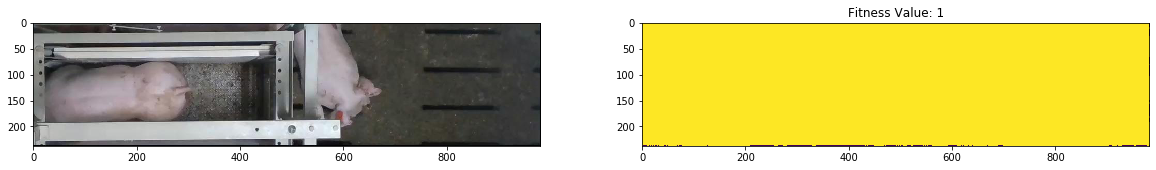

GridBox(children=(SelectionSlider(continuous_update=False, description='Channel', options=(0, 1, 2, 3, 4, 5), …

Output()

In [7]:
### Example of input for params
params = JupyterGUI.segmentwidget(img, gmask, params = None, alg = 'CT')

----
<a name="Genetic_Algorithm_Search"></a>

## Genetic Algorithm Search

First import image files, as well as the following packages:

In [8]:
from see import GeneticSearch, Segmentors

To run the genetic algorithm, we need to initialize an instance of an evolver. The original image and ground truth segmentation image are inputs to it, along with an integer value for population size. This value sets how many indivudals are in our population. For this example, we'll set this number to be equal to 10.

In [9]:
my_evolver = GeneticSearch.Evolver(img, gmask, pop_size=10)

Now that the evolver has been initialized, we can run the genetic algorithm for a specified number of generations (or iterations). Here we will set this number equal to 5.

In [ ]:
# warnings may appear when this runs
population = my_evolver.run(ngen=5)

Initializing a new random population
Generation 0 of population size 10
#HIST {'CT': 3, 'FB': 2, 'SC': 0, 'WS': 0, 'CV': 2, 'MCV': 2, 'AC': 1}
#BEST [[0.08294254565369936, 2, 2],  ['CT', 2798, 0.193, 6037, 0.59, 8353, 9802, 10, 0.97, 9297, 5031, 5, 7, 10000, 0.85, (1, 2), 7.6, 'disk', 'checkerboard', 3, 4674, 17, 0.0, 0.0, 0.0]]
pop[0:1:4:5]
pop[0:1:5:10]
Generation 1 of population size 10
#HIST {'CT': 4, 'FB': 1, 'SC': 0, 'WS': 0, 'CV': 2, 'MCV': 3, 'AC': 0}
#BEST [[0.08294254565369936, 2, 2],  ['CT', 2798, 0.193, 6037, 0.59, 8353, 9802, 10, 0.97, 9297, 5031, 5, 7, 10000, 0.85, (1, 2), 7.6, 'disk', 'checkerboard', 3, 4674, 17, 0.0, 0.0, 0.0]]
pop[0:1:4:5]
pop[0:1:5:10]
Generation 2 of population size 10
#HIST {'CT': 5, 'FB': 0, 'SC': 1, 'WS': 1, 'CV': 1, 'MCV': 1, 'AC': 1}


----
<a name="Reading_the_Results"></a>

## Reading the Results

After the genetic algorithm is complete, we can retrieve the individuals that resulted in the lowest (best) fitness values by printing `my_evolver.hof`. These individuals are sorted according to fitness value, so to get the overal best individual, we can simply look at the first individual in the list. 

In [ ]:
params = my_evolver.hof[0]

print('Best Individual:\n', params)

We can see the mask this individual generates by evaluating it, then plotting the result:

In [ ]:
seg = Segmentors.algoFromParams(params)
mask = seg.evaluate(img)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(122)
plt.imshow(mask)
plt.title("Segmentation")
plt.axis('off')

plt.tight_layout
plt.show()

We can also use `FitnessFunction` to calculate the final fitness value for this algorithm:

If this value is satisfactory, we can then get usable code to run this algorithm anywhere, including outside this notebook. The `print_best_algorithm_code` function does this using the given individual:

In [ ]:
ex = Segmentors.print_best_algorithm_code(my_evolver.hof[0])

With this code, make sure to import skimage, along with any input images this algorithm will be applied to.